# **Estimation and Confidence Interval**

- **Background:**
In quality control processes, especially when dealing with high-value items, destructive sampling is a necessary but costly method to ensure product quality. The test to determine whether an item meets the quality standards destroys the item, leading to the requirement of small sample sizes due to cost constraints.

- **Scenario:**
A manufacturer of print-heads for personal computers is interested in estimating the mean durability of their print-heads in terms of the number of characters printed before failure. To assess this, the manufacturer conducts a study on a small sample of print-heads due to the destructive nature of the testing process.

- **Data:**
A total of 15 print-heads were randomly selected and tested until failure. The durability of each print-head (in millions of characters) was recorded as follows:
1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29

- **Assignment Tasks:**
1. Build 99% Confidence Interval Using Sample Standard Deviation
Assuming the sample is representative of the population, construct a 99% confidence interval for the mean number of characters printed before the print-head fails using the sample standard deviation. Explain the steps you take and the rationale behind using the t-distribution for this task.
2. Build 99% Confidence Interval Using Known Population Standard Deviation
If it were known that the population standard deviation is 0.2 million characters, construct a 99% confidence interval for the mean number of characters printed before failure.


**Steps:**

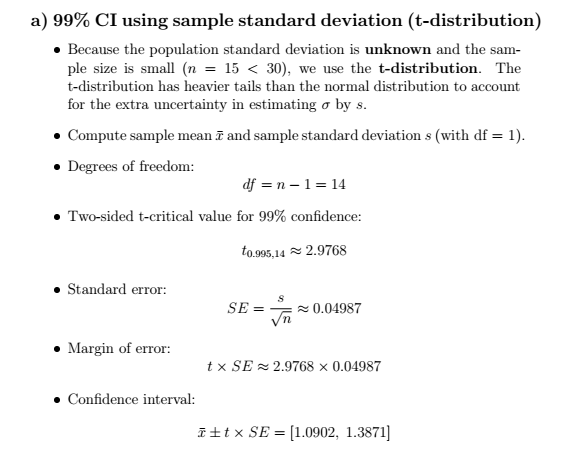
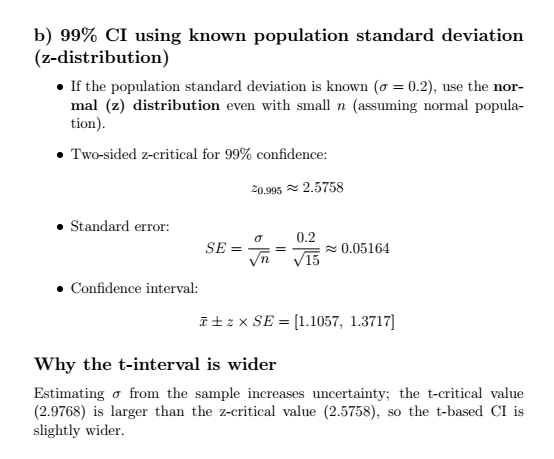

In [1]:
import math
import statistics as st
from scipy import stats

# Data (in millions of characters)
data = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29]

n = len(data)
sample_mean = st.mean(data)
sample_std_s = st.stdev(data)  # ddof=1

# a) 99% CI using sample standard deviation (t-distribution)
alpha = 0.01
df = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df)
se_sample = sample_std_s / math.sqrt(n)
ci_t_lower = sample_mean - t_crit * se_sample
ci_t_upper = sample_mean + t_crit * se_sample

# b) 99% CI using known population standard deviation (z-distribution)
sigma_known = 0.2
z_crit = stats.norm.ppf(1 - alpha/2)
se_known = sigma_known / math.sqrt(n)
ci_z_lower = sample_mean - z_crit * se_known
ci_z_upper = sample_mean + z_crit * se_known

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample std (s): {sample_std_s:.4f}\n")

print("99% CI using t-distribution:", f"[{ci_t_lower:.4f}, {ci_t_upper:.4f}]")
print("99% CI using known sigma (z):", f"[{ci_z_lower:.4f}, {ci_z_upper:.4f}]")


Sample mean: 1.2387
Sample std (s): 0.1932

99% CI using t-distribution: [1.0902, 1.3871]
99% CI using known sigma (z): [1.1057, 1.3717]


**Conclusion:**
1. With 99% confidence, the true mean durability lies between 1.09 and 1.39 million characters (t-interval).
2. If the manufacturer truly knows the population standard deviation is 0.2, the interval narrows slightly to 1.106 to 1.372 million.
3. Because the sample is small and σ is not usually known in practice, the t-based interval is the more conservative and appropriate choice.